<a href="https://colab.research.google.com/github/devarajma/Internship/blob/main/BestSeller.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Day - 1 : Understanding Dataset

In [ ]:
import os

# Path to your Internship folder
folder_path = '/content/drive/My Drive/Internship'

# List all files to verify
os.listdir(folder_path)


['amazon_com-product_reviews.csv',
 'bestsellers_with_categories.csv',
 'books.csv',
 'BestSeller.ipynb',
 'cleaned_data.csv']

In [ ]:
import pandas as pd

# Adjust the filename to match your actual file
file_path = os.path.join(folder_path, 'bestsellers_with_categories.csv')

# Load the dataset
df = pd.read_csv(file_path)

# Display first few rows
df.head(20)


,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
5,A Dance with Dragons (A Song of Ice and Fire),George R. R. Martin,4.4,12643,11,2011,Fiction
6,A Game of Thrones / A Clash of Kings / A Storm...,George R. R. Martin,4.7,19735,30,2014,Fiction
7,A Gentleman in Moscow: A Novel,Amor Towles,4.7,19699,15,2017,Fiction
8,"A Higher Loyalty: Truth, Lies, and Leadership",James Comey,4.7,5983,3,2018,Non Fiction
9,A Man Called Ove: A Novel,Fredrik Backman,4.6,23848,8,2016,Fiction


In [ ]:

print("----- Shape -----\n")
print(df.shape)
print("\n----- Info -----\n")
print(df.info())
print("\n----- Describe -----\n")
print(df.describe().T)

----- Shape -----

(550, 7)

----- Info -----

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB
None

----- Describe -----

             count          mean           std     min     25%     50%  \
User Rating  550.0      4.618364      0.226980     3.3     4.5     4.7   
Reviews      550.0  11953.281818  11731.132017    37.0  4058.0  8580.0   
Price        550.0     13.100000     10.842262     0.0     7.0    11.0   
Year         550.0   2014.000000      3.165156  2009.0  2011.0  2014.0   

         

# DAY - 2 : Data Cleaning

In [ ]:
print("\n----- Number of Null Record-----\n")
print(df.isnull().sum())
print("\n----- Number of Duplicate Record-----\n")
print(df.duplicated().sum())


----- Number of Null Record-----

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64

----- Number of Duplicate Record-----

0


In [ ]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
df.head()

,name,author,user_rating,reviews,price,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


# Day 3: Exploratory Data Analysis (EDA)

---



## 1. 📌 Top-Selling Books

### Top-Selling Books (By Reviews)

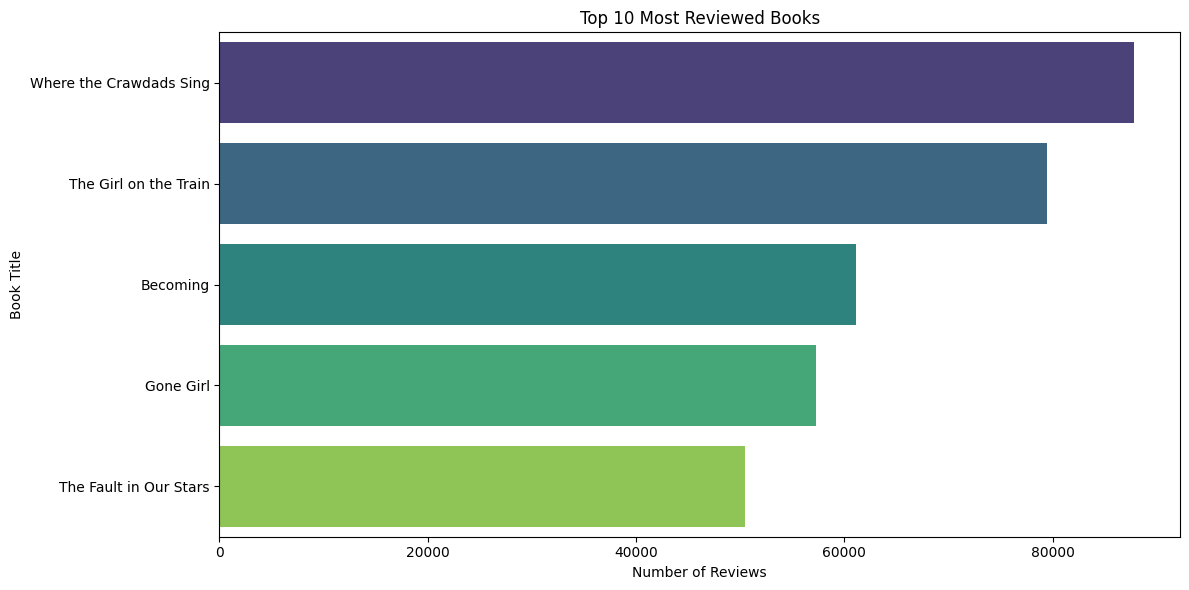

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


top_books = df.sort_values(by='reviews', ascending=False).head(10)
plt.figure(figsize=(12,6))
sns.barplot(data=top_books, x='reviews', y='name',hue='name' ,palette='viridis', legend=False)
plt.title('Top 10 Most Reviewed Books')
plt.xlabel('Number of Reviews')
plt.ylabel('Book Title')
plt.tight_layout()
plt.show()

## 2. 📉 Low-Review Books

### Least Reviewed Book (By Review)

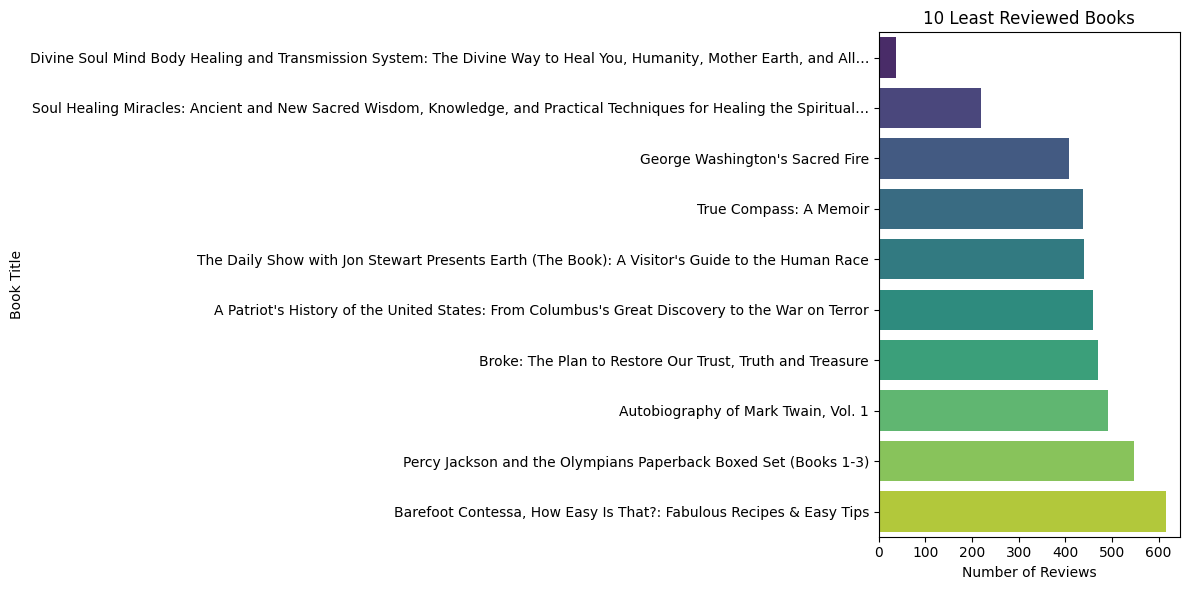

In [ ]:
low_books = df.sort_values(by='reviews').head(10)

plt.figure(figsize=(12,6))
sns.barplot(data=low_books, x='reviews', y='name', hue='name', palette='viridis',legend=False)
plt.title('10 Least Reviewed Books')
plt.xlabel('Number of Reviews')
plt.ylabel('Book Title')
plt.tight_layout()
plt.show()

## 3. Price Distribution

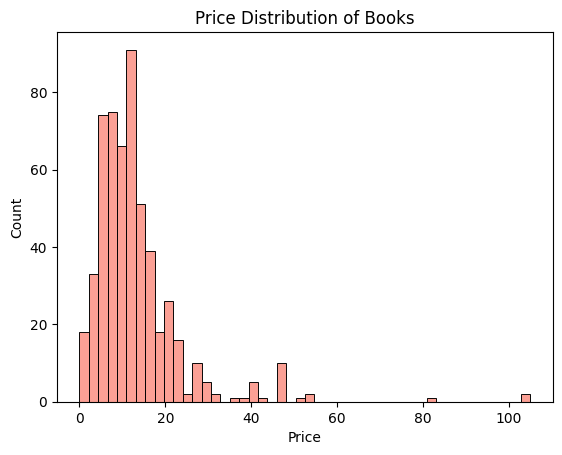

In [ ]:
sns.histplot(x=df['price'], color='salmon')
plt.title('Price Distribution of Books')
plt.xlabel('Price')
plt.show()


## 4. Yearly Trends in Ratings/Reviews

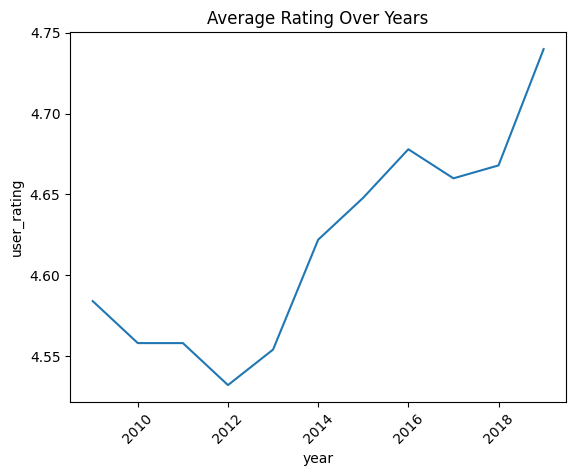

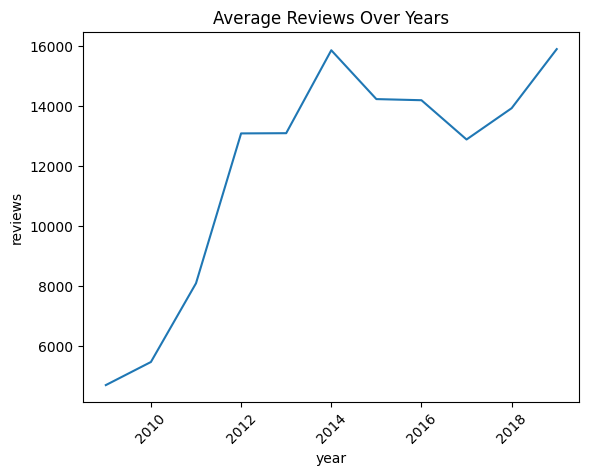

In [ ]:
sns.lineplot(data=df.groupby('year')['user_rating'].mean().reset_index(), x='year', y='user_rating')
plt.title('Average Rating Over Years')
plt.xticks(rotation=45)
plt.show()

sns.lineplot(data=df.groupby('year')['reviews'].mean().reset_index(), x='year', y='reviews')
plt.title('Average Reviews Over Years')
plt.xticks(rotation=45)
plt.show()


## 5. Relationship between price and reviews

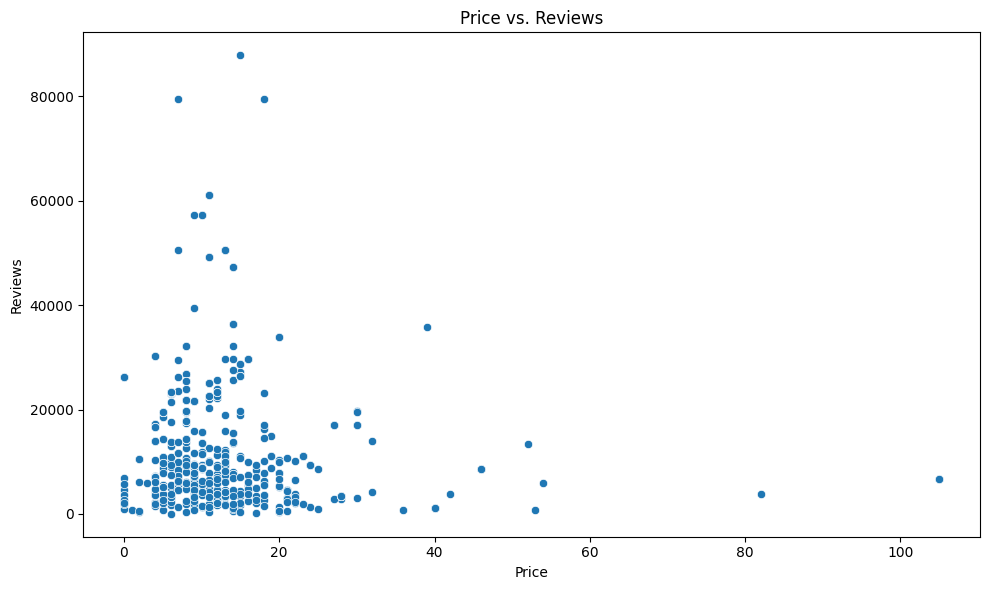

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='price', y='reviews')
plt.title("Price vs. Reviews")
plt.xlabel("Price")
plt.ylabel("Reviews")
plt.tight_layout()
plt.show()

## 6. Correlation Analysis

**What Is a Correlation Matrix?**


*A correlation matrix shows how strongly each numeric variable is related to others. It returns values between:*

* +1.0: Strong positive correlation (variables increase together)

* 0.0: No linear relationship

* -1.0: Strong negative correlation (one increases, the other decreases)


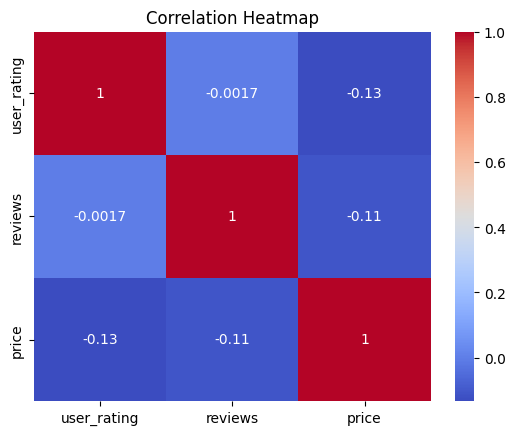

In [ ]:
sns.heatmap(df[['user_rating', 'reviews', 'price']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


## 7. Top 10 Books By Year

In [ ]:
def top_of_year(x):
  df_2018 = df[df['year'] == x].sort_values(by='reviews', ascending=False)
  print(df_2018[['name', 'author', 'reviews']].head(10))  # Top 5 of 2018

top_of_year(2018)

                                                  name           author  \
32                                            Becoming   Michelle Obama   
490                                   The Wonky Donkey      Craig Smith   
97                                  Educated: A Memoir    Tara Westover   
465  The Subtle Art of Not Giving a F*ck: A Counter...      Mark Manson   
220                            Little Fires Everywhere       Celeste Ng   
328  The 5 Love Languages: The Secret to Love that ...     Gary Chapman   
170              How to Win Friends & Influence People    Dale Carnegie   
379  The Four Agreements: A Practical Guide to Pers...  Don Miguel Ruiz   
293  School Zone - Big Preschool Workbook - Ages 4 ...      School Zone   
287                          Ready Player One: A Novel     Ernest Cline   

     reviews  
32     61133  
490    30183  
97     28729  
465    26490  
220    25706  
328    25554  
170    25001  
379    23308  
293    23047  
287    22536  


# If Needed

---



In [ ]:
ndf = df.drop_duplicates(subset=['name', 'author'])
ndf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 351 entries, 0 to 546
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         351 non-null    object 
 1   author       351 non-null    object 
 2   user_rating  351 non-null    float64
 3   reviews      351 non-null    int64  
 4   price        351 non-null    int64  
 5   year         351 non-null    int64  
 6   genre        351 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 21.9+ KB


In [76]:
cdf = ndf.copy()
cdf.head()

,name,author,user_rating,reviews,price,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


# **Day 4**

## 5. What is a Proxy?

---


**A proxy is an indirect measure or substitute for something we can’t directly observe.**

For example:

* *Sales Proxy = Number of reviews*

(Because high review count often means high sales volume)

* *Inventory Value Proxy = Price × Review Count*

(Rough estimate of total value based on popularity and price)

### **Step 1: Create Proxy Columns**

---

In [85]:
# Assume: For every 100 purchases, ~1 person leaves a review (industry average review rate ≈ 1%)
cdf['estimated_sales'] = cdf['reviews'] * 100

cdf['estimated_revenue'] = cdf['estimated_sales'] * df['price']

# A compound metric to combine rating and popularity:
# df['rating_score'] = df['user_rating'] * df['reviews']

# # To see if high-rated books are cheaper or expensive:
# df['price_per_rating'] = df['price'] / df['user_rating']


# You can classify books based on review count:
# def sales_category(x):
#     if x > 20000:
#         return 'High Seller'
#     elif x > 10000:
#         return 'Medium Seller'
#     else:
#         return 'Low Seller'

# cdf['sales_category'] = df['reviews'].apply(sales_category)

In [ ]:
ndf.shape[0]

351

In [ ]:
cdf.shape[0]

351

### **Step 2: Summary Statistics**

---



In [ ]:
summary_stats = cdf.describe()
print(summary_stats)

       user_rating       reviews       price        year  estimated_sales  \
count   351.000000    351.000000  351.000000   351.00000     3.510000e+02   
mean      4.608832   9799.683761   13.076923  2013.51567     9.799684e+05   
std       0.226669  10871.356548   10.050860     3.28271     1.087136e+06   
min       3.300000     37.000000    0.000000  2009.00000     3.700000e+03   
25%       4.500000   3442.500000    8.000000  2010.00000     3.442500e+05   
50%       4.600000   6346.000000   12.000000  2013.00000     6.346000e+05   
75%       4.800000  11470.500000   16.000000  2016.00000     1.147050e+06   
max       4.900000  87841.000000  105.000000  2019.00000     8.784100e+06   

       estimated_revenue  
count       3.510000e+02  
mean        1.258052e+07  
std         1.776955e+07  
min         0.000000e+00  
25%         3.131550e+06  
50%         7.138800e+06  
75%         1.397460e+07  
max         1.430028e+08  


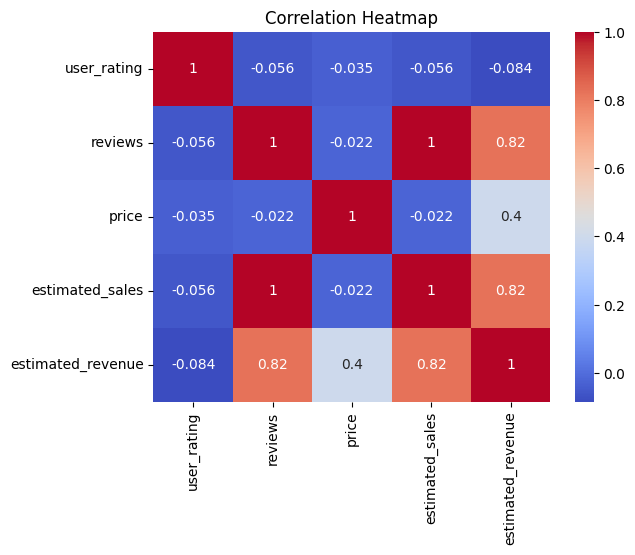

In [ ]:
correlation_matrix = cdf[['user_rating', 'reviews', 'price', 'estimated_sales', 'estimated_revenue']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### **Step 3: Top Performing Books**

---



In [ ]:
top_revenue_books = cdf.sort_values(by='estimated_revenue', ascending=False).head(5)[['name', 'price',  'estimated_sales', 'estimated_revenue','year']]
print(top_revenue_books)


                                                  name  price  \
382                              The Girl on the Train     18   
338                                      The Alchemist     39   
534                            Where the Crawdads Sing     15   
69   Diagnostic and Statistical Manual of Mental Di...    105   
159         Harry Potter Paperback Box Set (Books 1-7)     52   

     estimated_sales  estimated_revenue  year  
382          7944600        143002800.0  2015  
338          3579900        139616100.0  2014  
534          8784100        131761500.0  2019  
69            667900         70129500.0  2013  
159          1347100         70049200.0  2016  


### **Step 4: Visualizations**

---



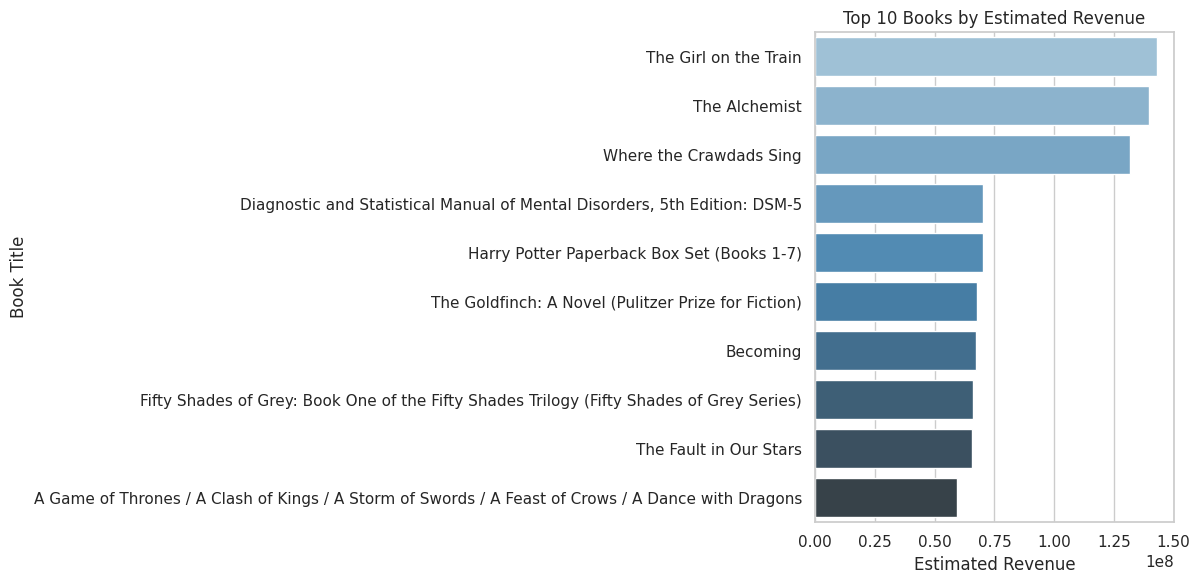

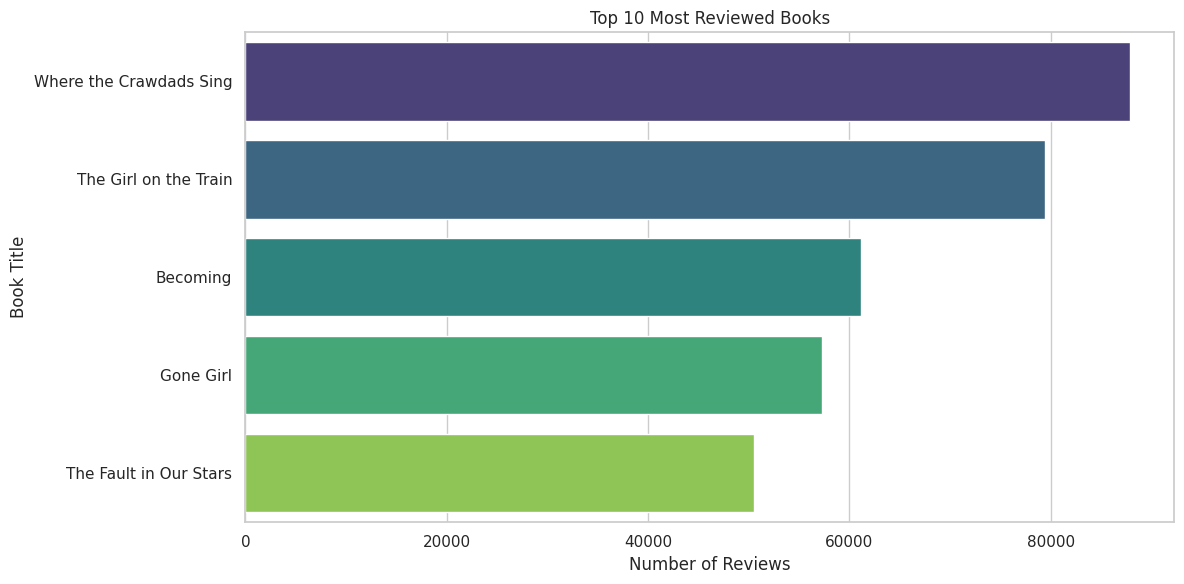

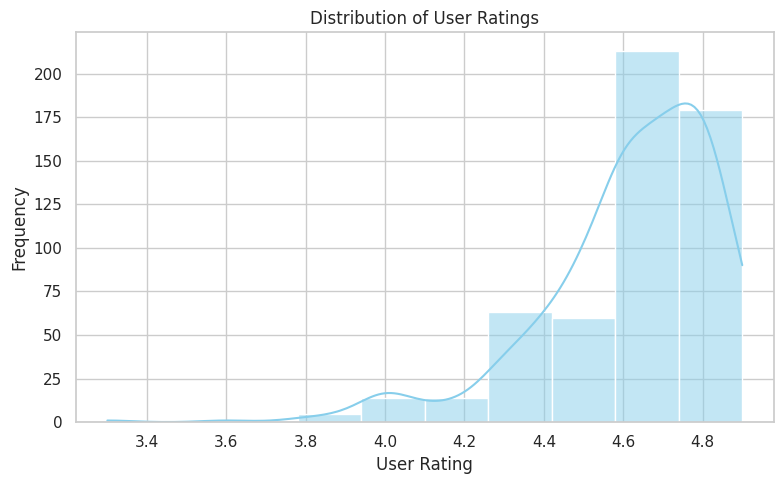

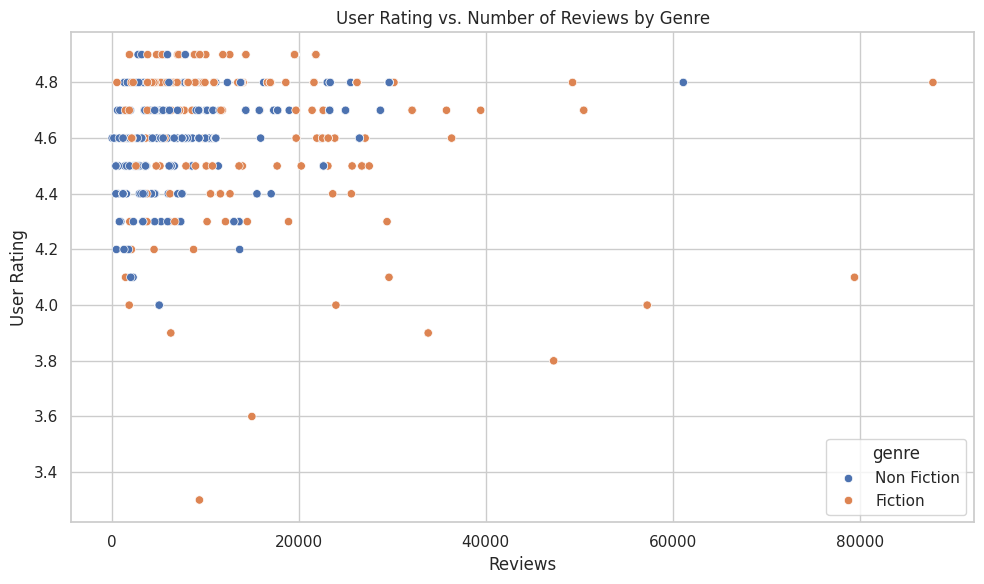

<ipython-input-27-574cc2c268d1>:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='genre', y='price', palette='Set2')


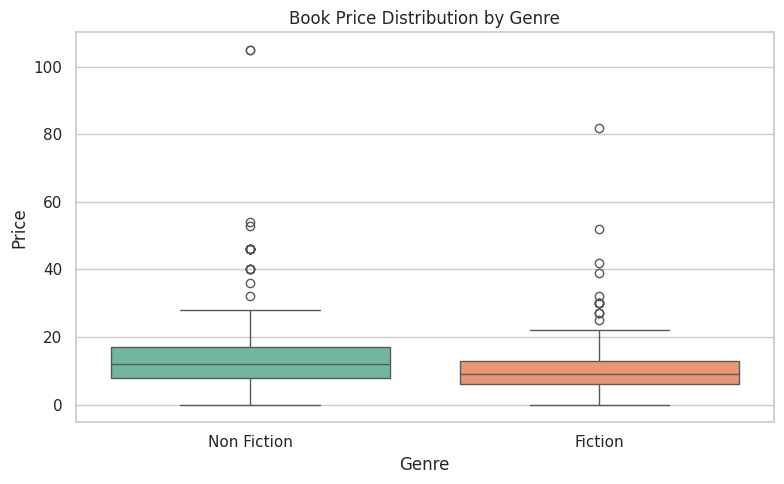

In [ ]:
sns.set(style="whitegrid")

# Plot 1: Top 10 Books by Estimated Revenue
top10_revenue = cdf.sort_values(by='estimated_revenue', ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(data=top10_revenue, y='name', x='estimated_revenue', hue='name',legend=False, palette='Blues_d')
plt.title("Top 10 Books by Estimated Revenue")
plt.xlabel("Estimated Revenue")
plt.ylabel("Book Title")
plt.tight_layout()
plt.show()

# Plot 2:  Top 10 Most reviewed Books
plt.figure(figsize=(12,6))
sns.barplot(data=top_books, x='reviews', y='name',hue='name',legend=False, palette='viridis')
plt.title('Top 10 Most Reviewed Books')
plt.xlabel('Number of Reviews')
plt.ylabel('Book Title')
plt.tight_layout()
plt.show()


# Plot 3: Distribution of User Ratings
plt.figure(figsize=(8, 5))
sns.histplot(df['user_rating'], bins=10, kde=True, color='skyblue')
plt.title("Distribution of User Ratings")
plt.xlabel("User Rating")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# Plot 4: Rating vs. Reviews (by Genre)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='reviews', y='user_rating', hue='genre')
plt.title("User Rating vs. Number of Reviews by Genre")
plt.xlabel("Reviews")
plt.ylabel("User Rating")
plt.tight_layout()
plt.show()

# Plot 5: Genre vs. Average Price
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='genre', y='price', palette='Set2')
plt.title("Book Price Distribution by Genre")
plt.xlabel("Genre")
plt.ylabel("Price")
plt.tight_layout()
plt.show()



In [ ]:
# file_path = os.path.join(folder_path, 'cleaned_data.csv')
# cdf.to_csv(file_path, index=False)

# Day 5 (Optional)

## Try - 1

---



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [93]:
cdf['genre_encoded'] = cdf['genre'].apply(lambda x: 1 if x == 'Fiction' else 0)
cdf.head()

,name,author,user_rating,reviews,price,year,genre,genre_encoded,estimated_sales,estimated_revenue
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction,0,1735000,13880000.0
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction,1,205200,4514400.0
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction,0,1897900,28468500.0
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction,1,2142400,12854400.0
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction,0,766500,9198000.0


In [65]:
df_encoded = pd.get_dummies(cdf, columns=['genre'], drop_first=True)
print(df_encoded.head())

                                                name  \
0                      10-Day Green Smoothie Cleanse   
1                                  11/22/63: A Novel   
2            12 Rules for Life: An Antidote to Chaos   
3                             1984 (Signet Classics)   
4  5,000 Awesome Facts (About Everything!) (Natio...   

                     author  user_rating  reviews  price  year  \
0                  JJ Smith          4.7    17350      8  2016   
1              Stephen King          4.6     2052     22  2011   
2        Jordan B. Peterson          4.7    18979     15  2018   
3             George Orwell          4.7    21424      6  2017   
4  National Geographic Kids          4.8     7665     12  2019   

   estimated_sales  estimated_revenue  genre_Non Fiction  
0          1735000         13880000.0               True  
1           205200          4514400.0              False  
2          1897900         28468500.0               True  
3          2142400         128

R² Score: 0.0092
RMSE: 13.4


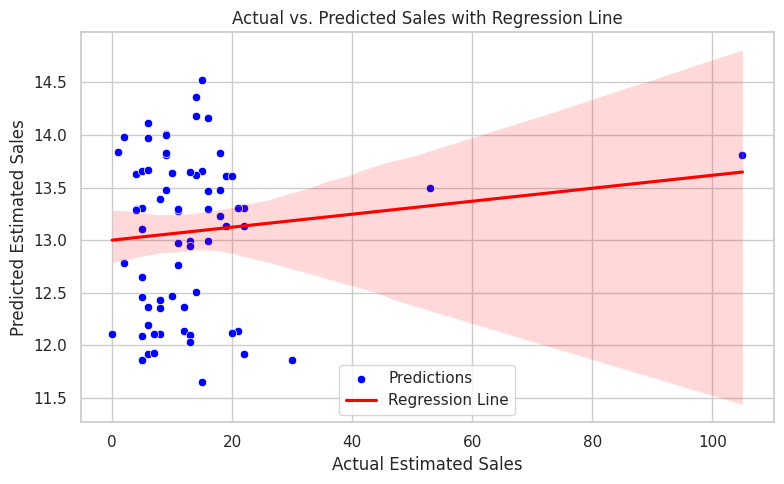

         Feature  Coefficient
0        reviews    -0.000006
1    user_rating    -1.734726
2  genre_encoded    -1.178016
Intercept :  21.649600864904983


In [107]:
# X = df_encoded[['price', 'user_rating', 'genre_encoded']]
# y = df_encoded['estimated_sales']

X = df_encoded[['reviews', 'user_rating', 'genre_encoded']]
y = df_encoded['price']



X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))


print("R² Score:", round(r2, 4))
print("RMSE:", round(rmse, 2))


plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred, color='blue', label='Predictions')
sns.regplot(x=y_test, y=y_pred, scatter=False, color='red', label='Regression Line')
plt.xlabel("Actual Estimated Sales")
plt.ylabel("Predicted Estimated Sales")
plt.title("Actual vs. Predicted Sales with Regression Line")
plt.legend()
plt.tight_layout()
plt.show()



coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})
print(coef_df)
print('Intercept : ' ,model.intercept_)

# output

# R² Score: 0.0407
# RMSE: 1348137.21

# R² Score: 0.0092
# RMSE: 13.4


## Try-2

---



R² Score: 0.141
RMSE: 1275734.32


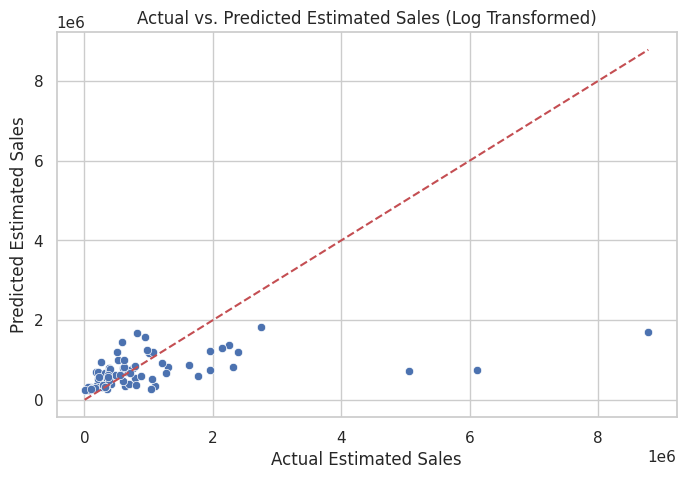


Feature Importance:
          Feature  Coefficient
0          price     0.005208
1    user_rating    -0.262647
2           year     0.123764
3  genre_encoded     0.676133


In [108]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# ---- Prepare Data ----
# One-hot encode the 'genre' column
df_encoded = pd.get_dummies(cdf, columns=['genre'], drop_first=True)

# Feature matrix (X) and target (y)
X = df_encoded[['price', 'user_rating', 'year', 'genre_encoded']]

# Log-transform the target for better regression performance
y = np.log1p(df_encoded['estimated_sales'])  # log(1 + sales)

# ---- Split the Data ----
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ---- Train Linear Regression Model ----
model = LinearRegression()
model.fit(X_train, y_train)

# ---- Predict on Test Set ----
y_pred_log = model.predict(X_test)

# Convert log predictions back to original scale
y_test_actual = np.expm1(y_test)
y_pred_actual = np.expm1(y_pred_log)

# ---- Evaluation Metrics ----
r2 = r2_score(y_test_actual, y_pred_actual)
rmse = np.sqrt(mean_squared_error(y_test_actual, y_pred_actual))

print("R² Score:", round(r2, 4))
print("RMSE:", round(rmse, 2))

# ---- Optional: Plot Actual vs Predicted ----
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test_actual, y=y_pred_actual)
plt.xlabel("Actual Estimated Sales")
plt.ylabel("Predicted Estimated Sales")
plt.title("Actual vs. Predicted Estimated Sales (Log Transformed)")
plt.plot([y_test_actual.min(), y_test_actual.max()],
         [y_test_actual.min(), y_test_actual.max()], 'r--')
plt.show()

# ---- Coefficient Analysis ----
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})
print("\nFeature Importance:\n", coef_df)
